In [7]:
%matplotlib inline 
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def SEIR(y, t, N, β, δ, γ):
    S,E, I, R = y
    dSdt =-β * S * I / N
    dEdt = β * S * I / N - δ*E
    dIdt = δ * E - γ * I
    dRdt = γ * I
    return dSdt, dEdt, dIdt, dRdt

In [9]:
N  = 1000000
r0 = 2  # infected person infects 1 other person per day
D  = 7.0 # infections lasts four days
γ  = 1.0 / D
δ  = 1.0/ 5.0
β  = r0 * γ

S0, E0, I0, R0 = N-1, 1, 0, 0  # initial conditions: one exposed

In [10]:
t = np.linspace(0, 364, 365) # Grid of time points (in days)
y0 = S0, E0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(SEIR, y0, t, args=(N, β,δ, γ))
S, E, I, R = ret.T

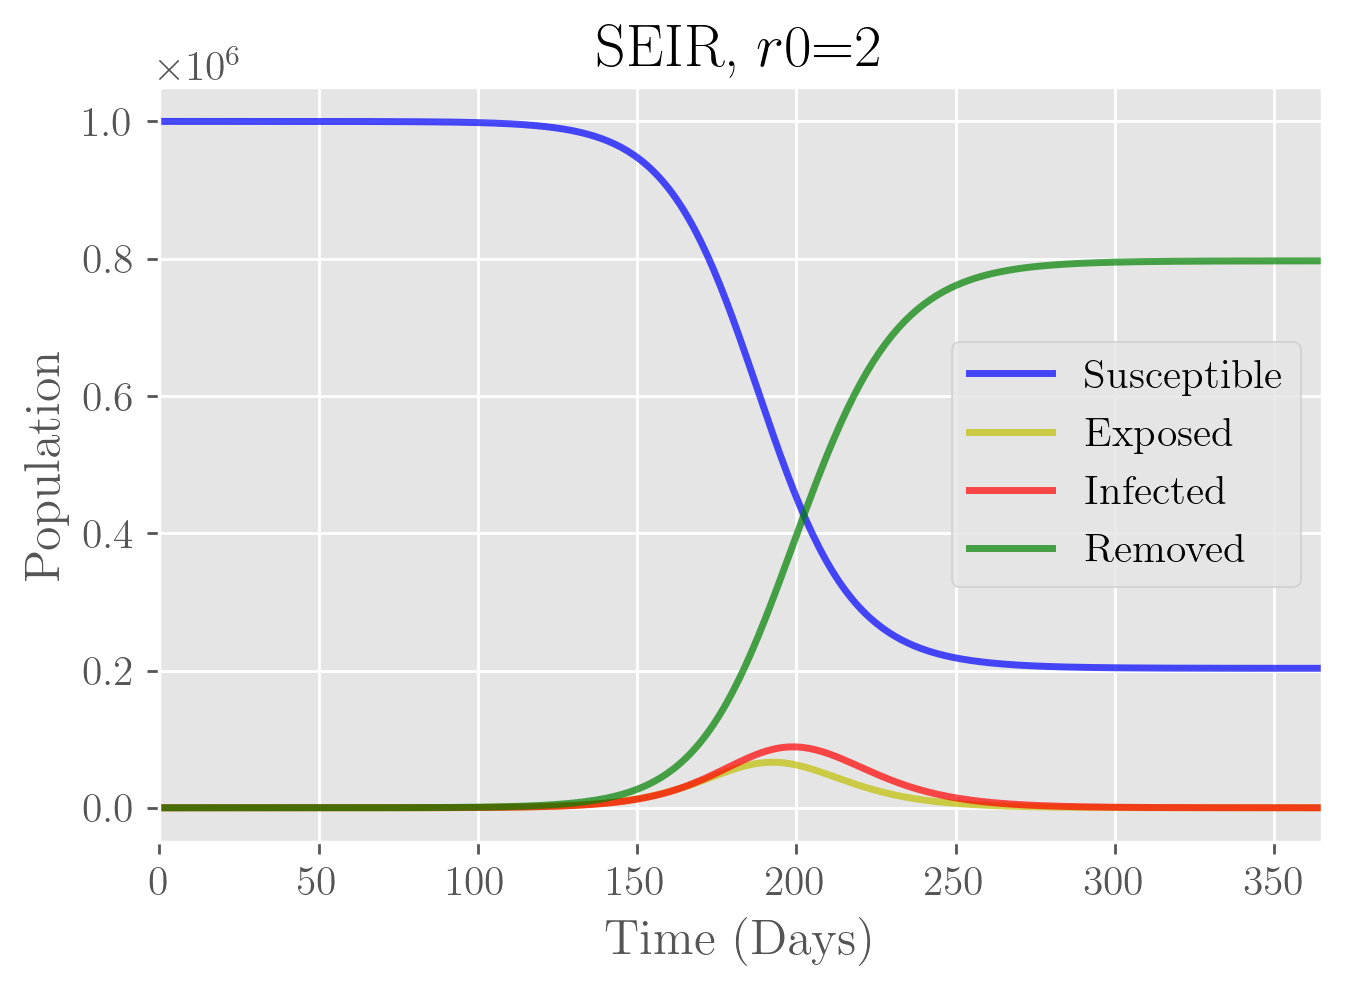

In [17]:
plt.style.use('ggplot')
plt.rcParams['figure.dpi']= 250
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', weight = 'bold', size =12 )

f, ax = plt.subplots()
ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Removed')

plt.legend(loc='best')

plt.xlabel('Time (Days)')
plt.xlim([0, 365])

plt.ylabel('Population')

plt.title("SEIR, $r0$={}".format(r0))
plt.draw()
plt.savefig('SEIRPlot.png', dpi=300)
plt.show()
